## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [23]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
import tensorflow as tf
tf.set_random_seed(42)

In [24]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [25]:
print('Number of Training examples X: ', x_train.shape[0])
print('Number of Training examples Y: ', y_train.shape[0])

Number of Training examples X:  60000
Number of Training examples Y:  60000


In [26]:
print('Number of Test examples X: ', x_test.shape[0])
print('Number of Test examples Y: ', y_test.shape[0])

Number of Test examples X:  10000
Number of Test examples Y:  10000


### Find dimensions of an image in the dataset

label for each of the below image: 0


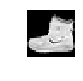

In [27]:
import numpy as np
# visualizing the first image in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1)) #width 10, height 1

plt.subplot(1, 10, 1)
plt.imshow(x_train[0].reshape(28, 28), cmap="gray")
plt.axis('off')
print('label for each of the below image: %s' % (np.argmax(y_train[0:10][1])))
plt.show()

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [28]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [29]:
print('Number of Training examples Y: ', y_train.shape[0])
print('Number of Test examples Y: ', y_test.shape[0])
print(y_train.shape)
print(y_test.shape)

Number of Training examples Y:  60000
Number of Test examples Y:  10000
(60000, 10)
(10000, 10)


### Normalize both the train and test image data from 0-255 to 0-1

In [30]:
x_train = x_train / 255.0
x_test = x_test / 255.0

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [31]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))


In [32]:
x_train.shape

(60000, 28, 28, 1)

In [33]:
x_test.shape

(10000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [35]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
#Normalize the data
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(33, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
#Normalize the data
model.add(keras.layers.BatchNormalization())
# Add Flatten before passing the feature map into 2 fully connected layers
model.add(Flatten())
#Hidden layers
model.add(Dense(128, activation='relu', name='Layer_1'))
model.add(Dense(10, activation='softmax', name='Layer_2'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 33)        9537      
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 33)        132       
_________________________________________________________________
flatten_3 (Flatten)          (None, 19008)             0         
_________________________________________________________________
Layer_1 (Dense)              (None, 128)               2433152   
_________________________________________________________________
Layer_2 (Dense)              (None, 10)                1290      
Total para

In [37]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10, callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 267s 4ms/step - loss: 0.4490 - acc: 0.8573 - val_loss: 0.3454 - val_acc: 0.8844
Epoch 2/10
60000/60000 [==============================] - 265s 4ms/step - loss: 0.2537 - acc: 0.9084 - val_loss: 0.3027 - val_acc: 0.8953
Epoch 3/10
60000/60000 [==============================] - 273s 5ms/step - loss: 0.2013 - acc: 0.9266 - val_loss: 0.3061 - val_acc: 0.9000
Epoch 4/10
60000/60000 [==============================] - 276s 5ms/step - loss: 0.1587 - acc: 0.9420 - val_loss: 0.2915 - val_acc: 0.9073
Epoch 5/10
60000/60000 [==============================] - 280s 5ms/step - loss: 0.1247 - acc: 0.9541 - val_loss: 0.3470 - val_acc: 0.9038
Epoch 6/10
60000/60000 [==============================] - 282s 5ms/step - loss: 0.1050 - acc: 0.9616 - val_loss: 0.3833 - val_acc: 0.9097
Epoch 7/10
60000/60000 [==============================] - 281s 5ms/step - loss: 0.0922 - acc: 0.9679 - val_loss: 0.4802 - 

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [38]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
#Normalize the data
model.add(keras.layers.BatchNormalization())
model.add(Conv2D(33, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
#Normalize the data
model.add(keras.layers.BatchNormalization())
# Add MaxPooling2D and Dropput after the convolution layers
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
#Hidden layers
model.add(Dense(128, activation='relu', name='Layer_1'))
model.add(Dense(10, activation='softmax', name='Layer_2'))


# Compile the Model and Train the model 

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 33)        9537      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 33)        132       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 33)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 33)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4752)              0         
__________

In [41]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10, callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 507s 8ms/step - loss: 0.3912 - acc: 0.8639 - val_loss: 0.3085 - val_acc: 0.8882
Epoch 2/10
60000/60000 [==============================] - 659s 11ms/step - loss: 0.2570 - acc: 0.9061 - val_loss: 0.3196 - val_acc: 0.8857
Epoch 3/10
60000/60000 [==============================] - 501s 8ms/step - loss: 0.2148 - acc: 0.9203 - val_loss: 0.3269 - val_acc: 0.8907
Epoch 4/10
60000/60000 [==============================] - 287s 5ms/step - loss: 0.1886 - acc: 0.9304 - val_loss: 0.2663 - val_acc: 0.9110
Epoch 5/10
60000/60000 [==============================] - 258s 4ms/step - loss: 0.1637 - acc: 0.9395 - val_loss: 0.2568 - val_acc: 0.9113
Epoch 6/10
60000/60000 [==============================] - 256s 4ms/step - loss: 0.1473 - acc: 0.9458 - val_loss: 0.2514 - val_acc: 0.9188
Epoch 7/10
60000/60000 [==============================] - 246s 4ms/step - loss: 0.1298 - acc: 0.9518 - val_loss: 0.2522 -

In [42]:
scores = model.evaluate(x_test, y_test)
print('accuracy: ',scores[1]*100)
print('loss: ',scores[0])
scores[1]*100

10000/10000 [==============================] - 15s 2ms/step
accuracy:  91.78
loss:  0.2822371180355549


91.78

**Validation Accuracy is 91.78% with loss of 0.28**